Question 1: Consider the iris data file seeds.csv. 
A. Import the file to python
B. Perform pre processing
C. Divide the data set in 80% training and 20% testing
D. Select the RNN Neural Network
E. Perform the training of the model
F. Test the model with test data
G. Evaluate the performance of your model


In [1]:
import pandas as pd
# used to read the data set
import numpy as np
# used to do some operations with the arrays
import os
# used handle some files


In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,1
96,97,5.7,2.9,4.2,1.3,1
97,98,6.2,2.9,4.3,1.3,1
98,99,5.1,2.5,3.0,1.1,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns = ['Species'])
Y = df['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [7]:
X_train=X_train.to_numpy()

In [8]:
X_train=X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [9]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [10]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(5, 1), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3))


In [11]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history=model.fit(X_train, Y_train, epochs=50, batch_size=16)

Epoch 1/50
8/8 [==============================] - 1s 4ms/step - loss: 19.0374 - accuracy: 0.2833
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.0750
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.2583
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.4500
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.5083
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.3250
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.3083
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.5000
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.4833
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.6250
Epoch 11/50
8/8 [=====================

In [12]:
X_test=X_test.to_numpy()
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [13]:
maoo=model.predict(X_test)

In [14]:
maoo

array([[ 1.1942617e+00,  1.2290772e+00,  1.1982167e+00],
       [ 7.5306571e-01,  7.8219330e-01,  7.6047945e-01],
       [ 1.1076292e+00,  1.1422882e+00,  1.1162536e+00],
       [ 1.2161500e-03, -6.5529197e-03, -4.6553090e-03],
       [ 1.7400824e+00,  1.7665298e+00,  1.7438751e+00],
       [ 1.8941315e+00,  1.9028220e+00,  1.9235960e+00],
       [ 2.8804457e-03,  3.7222207e-03,  1.4387604e-02],
       [ 1.9104120e+00,  1.9217510e+00,  1.9349912e+00],
       [ 8.1409252e-01,  7.1361840e-01,  8.8042849e-01],
       [ 1.2236588e+00,  1.2644773e+00,  1.2322576e+00],
       [ 1.6848072e+00,  1.7028447e+00,  1.7189311e+00],
       [ 1.8540459e+00,  1.8836251e+00,  1.8711240e+00],
       [ 1.7253624e+00,  1.7391298e+00,  1.7494431e+00],
       [ 6.9911885e-01,  7.2794235e-01,  6.9035035e-01],
       [ 1.7574202e+00,  1.7762648e+00,  1.8114693e+00],
       [ 1.8367646e+00,  1.8615279e+00,  1.8642721e+00],
       [ 1.0098240e-02,  5.1249146e-02,  5.2181508e-02],
       [ 2.3637032e-03,  1.6885

In [15]:
Y_test

95     1
64     1
88     1
48     0
119    2
128    2
11     0
137    2
50     1
97     1
123    2
129    2
108    2
57     1
120    2
125    2
23     0
43     0
28     0
105    2
66     1
37     0
80     1
138    2
113    2
99     1
145    2
71     1
47     0
45     0
Name: Species, dtype: int32

In [16]:
from matplotlib import pyplot

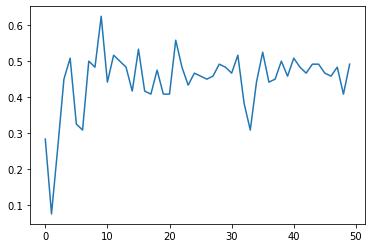

In [17]:
pyplot.plot(history.history['accuracy'])

In [18]:
y_pred_bool = np.argmax(maoo, axis=1)

In [19]:
y_pred_bool

array([1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1], dtype=int64)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(classification_report(Y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.57      0.80      0.67        10
           2       0.67      0.83      0.74        12

    accuracy                           0.63        30
   macro avg       0.75      0.59      0.54        30
weighted avg       0.72      0.63      0.58        30

